<a href="https://colab.research.google.com/github/aschoudry/CNN_for_GW/blob/main/CNN_pycbcTrnsferLrn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np
from tensorflow.keras import layers

In [2]:
input = layers.Input(shape=(256, 256, 3))
x = layers.Conv2D(32, kernel_size=3, activation='relu')(input)
x = layers.MaxPool2D((3,3))(x)
x = layers.Conv2D(64, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D((3,3))(x)
x = layers.Flatten()(x)
output = layers.Dense(units=1)(x)

In [3]:
model = keras.Model(inputs=input, outputs=output)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 46656)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 46657 

In [5]:
model.compile(optimizer='Adam', loss='mse')

In [6]:
def process_path(file_path):
  label = tf.strings.split(file_path, '_')[-2]
  label = tf.strings.to_number(label)
  image = tf.io.decode_png(tf.io.read_file(file_path))
  image = tf.cast(image, tf.float32)
  image/=255
  return image, label

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
list_ds_train = tf.data.Dataset.list_files('/content/gdrive/MyDrive/pycbc_image_data_noise_added/train_m_*_.png', shuffle=True)
labeled_ds_train = list_ds_train.map(process_path)
labeled_ds_train = labeled_ds_train.batch(20)

In [9]:
list_ds_test = tf.data.Dataset.list_files('/content/gdrive/MyDrive/pycbc_image_data_noise_added/test_m_*_.png', shuffle=True)
labeled_ds_test = list_ds_test.map(process_path)
labeled_ds_test = labeled_ds_test.batch(20)

In [10]:
history = model.fit(labeled_ds_train, epochs=50, verbose=2, validation_data=labeled_ds_test)

Epoch 1/50
75/75 - 204s - loss: 923.7703 - val_loss: 35.9691
Epoch 2/50
75/75 - 5s - loss: 10.6660 - val_loss: 5.8220
Epoch 3/50
75/75 - 5s - loss: 5.4638 - val_loss: 4.2659
Epoch 4/50
75/75 - 5s - loss: 5.2878 - val_loss: 6.9789
Epoch 5/50
75/75 - 5s - loss: 4.4412 - val_loss: 2.9897
Epoch 6/50
75/75 - 5s - loss: 3.1880 - val_loss: 3.7621
Epoch 7/50
75/75 - 5s - loss: 3.1102 - val_loss: 2.7167
Epoch 8/50
75/75 - 5s - loss: 2.9465 - val_loss: 2.0172
Epoch 9/50
75/75 - 5s - loss: 2.6810 - val_loss: 2.1357
Epoch 10/50
75/75 - 5s - loss: 2.2068 - val_loss: 1.6760
Epoch 11/50
75/75 - 5s - loss: 1.9096 - val_loss: 1.7373
Epoch 12/50
75/75 - 5s - loss: 1.7774 - val_loss: 1.7492
Epoch 13/50
75/75 - 5s - loss: 1.6462 - val_loss: 1.3924
Epoch 14/50
75/75 - 5s - loss: 1.4692 - val_loss: 1.3098
Epoch 15/50
75/75 - 5s - loss: 1.8082 - val_loss: 1.5253
Epoch 16/50
75/75 - 5s - loss: 1.4959 - val_loss: 1.7896
Epoch 17/50
75/75 - 5s - loss: 1.3536 - val_loss: 1.2262
Epoch 18/50
75/75 - 5s - loss: 1.1

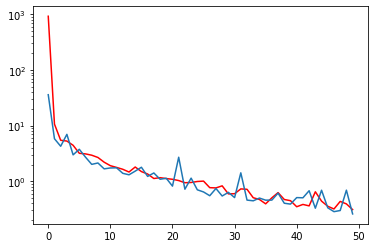

In [11]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'])
plt.yscale("log")

In [12]:
base_model = keras.applications.VGG19(include_top=False, weights='imagenet')

80150528/80134624 [==============================] - 1s 0us/step


In [13]:
base_model.trainable = False

In [14]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [15]:
input = layers.Input(shape=(256, 256, 3))
x = base_model(input)
x = layers.Flatten()(x)
output = layers.Dense(units=1)(x)

In [16]:
model_VGG = keras.Model(inputs=input, outputs=output)

In [17]:
model_VGG.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
vgg19 (Functional)           (None, None, None, 512)   20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 32769     
Total params: 20,057,153
Trainable params: 32,769
Non-trainable params: 20,024,384
_________________________________________________________________


In [18]:
model_VGG.compile(optimizer='Adam', loss='mse')

In [19]:
history_VGG = model_VGG.fit(labeled_ds_train, epochs=50, verbose=2, validation_data=labeled_ds_test)

Epoch 1/50
75/75 - 35s - loss: 579.5875 - val_loss: 98.4422
Epoch 2/50
75/75 - 26s - loss: 46.4678 - val_loss: 25.8315
Epoch 3/50
75/75 - 26s - loss: 13.1984 - val_loss: 9.9377
Epoch 4/50
75/75 - 26s - loss: 5.6478 - val_loss: 5.8122
Epoch 5/50
75/75 - 26s - loss: 3.6880 - val_loss: 4.1233
Epoch 6/50
75/75 - 26s - loss: 2.8912 - val_loss: 3.5493
Epoch 7/50
75/75 - 26s - loss: 2.4394 - val_loss: 2.7875
Epoch 8/50
75/75 - 26s - loss: 2.0700 - val_loss: 2.4092
Epoch 9/50
75/75 - 26s - loss: 1.7507 - val_loss: 2.0202
Epoch 10/50
75/75 - 26s - loss: 1.5203 - val_loss: 1.7791
Epoch 11/50
75/75 - 26s - loss: 1.3186 - val_loss: 1.5281
Epoch 12/50
75/75 - 26s - loss: 1.1503 - val_loss: 1.3437
Epoch 13/50
75/75 - 26s - loss: 1.0148 - val_loss: 1.2641
Epoch 14/50
75/75 - 26s - loss: 0.9398 - val_loss: 1.2488
Epoch 15/50
75/75 - 26s - loss: 0.8074 - val_loss: 0.9688
Epoch 16/50
75/75 - 26s - loss: 0.7252 - val_loss: 0.9082
Epoch 17/50
75/75 - 26s - loss: 0.7016 - val_loss: 0.8291
Epoch 18/50
75/75

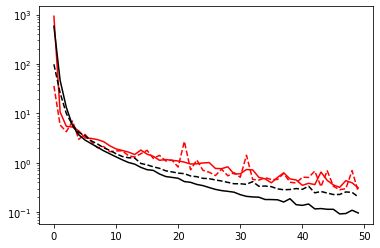

In [22]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'r--')
plt.plot(history_VGG.history['loss'], 'k')
plt.plot(history_VGG.history['val_loss'], 'k--')
plt.yscale("log")